## Import Modules

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

In [ ]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/toronto'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [ ]:
len(paths)

2800

In [ ]:
paths[:5]

['/content/drive/MyDrive/toronto/TESS Toronto emotional speech set data/YAF_disgust/YAF_bath_disgust.wav',
 '/content/drive/MyDrive/toronto/TESS Toronto emotional speech set data/YAF_disgust/YAF_door_disgust.wav',
 '/content/drive/MyDrive/toronto/TESS Toronto emotional speech set data/YAF_disgust/YAF_chat_disgust.wav',
 '/content/drive/MyDrive/toronto/TESS Toronto emotional speech set data/YAF_disgust/YAF_book_disgust.wav',
 '/content/drive/MyDrive/toronto/TESS Toronto emotional speech set data/YAF_disgust/YAF_germ_disgust.wav']

In [ ]:
labels[:5]

['disgust', 'disgust', 'disgust', 'disgust', 'disgust']

In [ ]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/drive/MyDrive/toronto/TESS Toronto em...,disgust
1,/content/drive/MyDrive/toronto/TESS Toronto em...,disgust
2,/content/drive/MyDrive/toronto/TESS Toronto em...,disgust
3,/content/drive/MyDrive/toronto/TESS Toronto em...,disgust
4,/content/drive/MyDrive/toronto/TESS Toronto em...,disgust


In [ ]:
df['label'].value_counts()

ps         600
sad        600
disgust    400
fear       400
neutral    400
happy      200
angry      200
Name: label, dtype: int64

## Exploratory Data Analysis

In [ ]:
# sns.countplot(df['label'])

In [ ]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

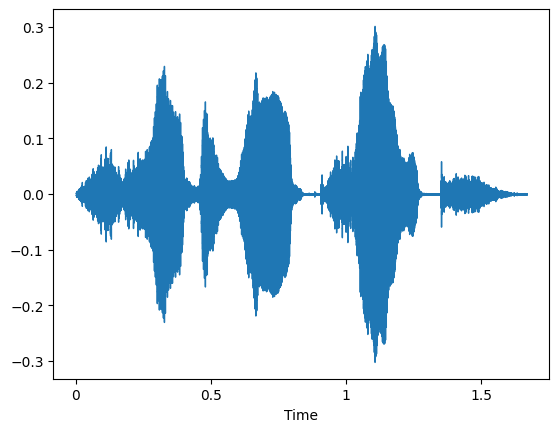

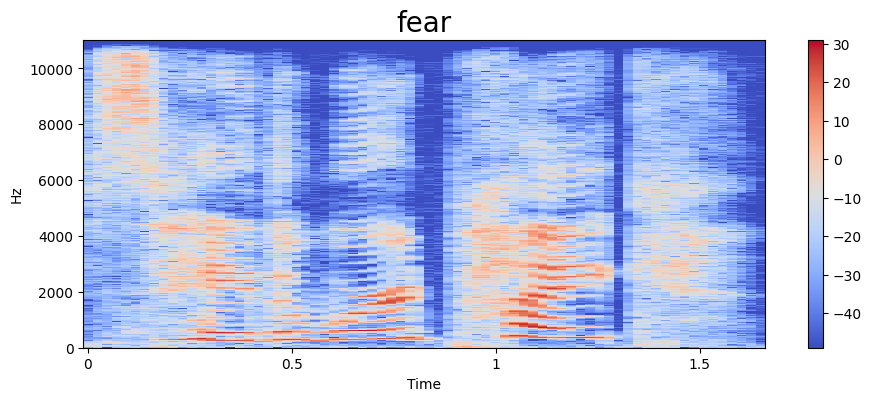

In [ ]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data)
spectogram(data, sampling_rate, emotion)
Audio(path)

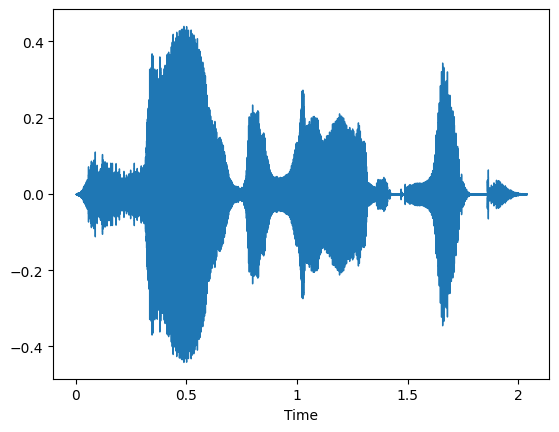

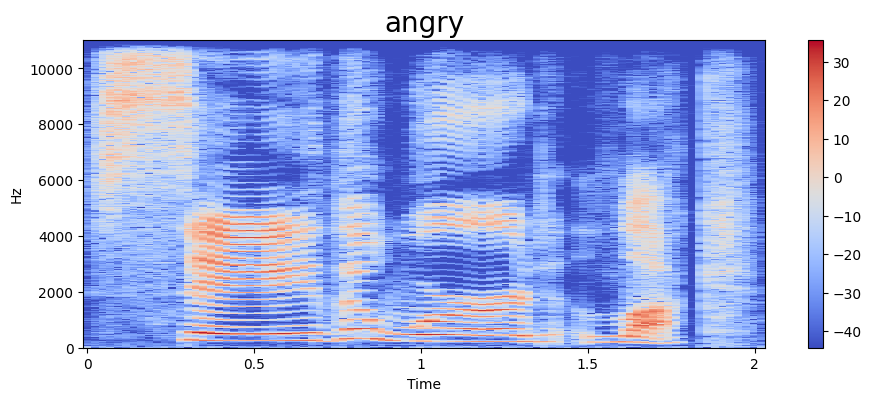

In [ ]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data)
spectogram(data, sampling_rate, emotion)
Audio(path)

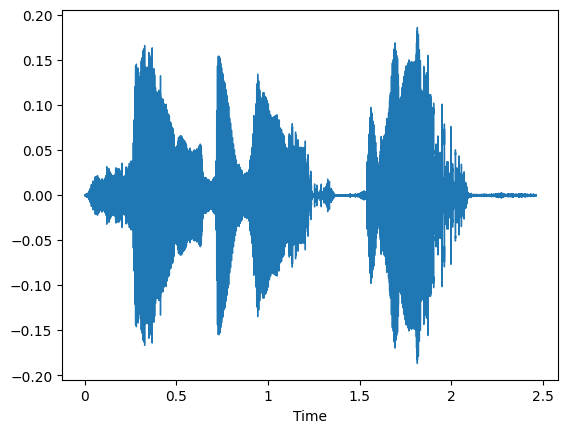

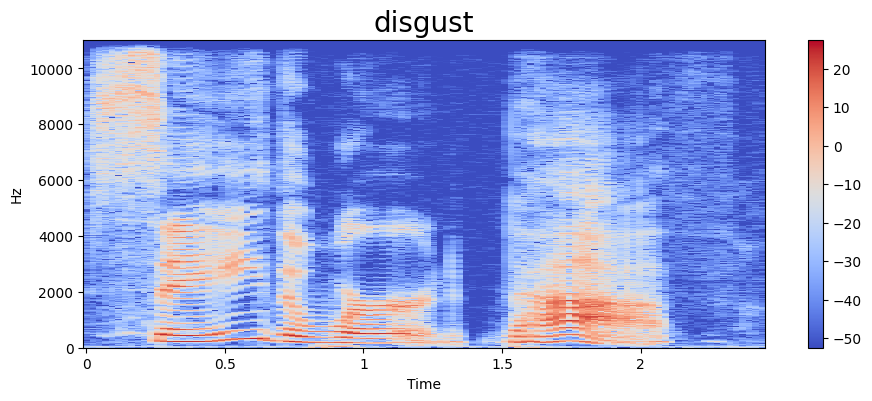

In [ ]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data)
spectogram(data, sampling_rate, emotion)
Audio(path)

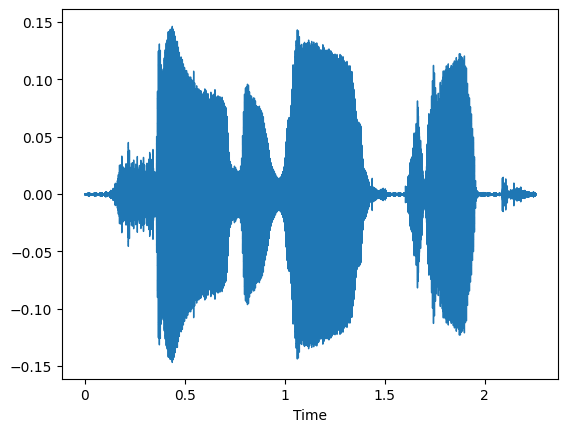

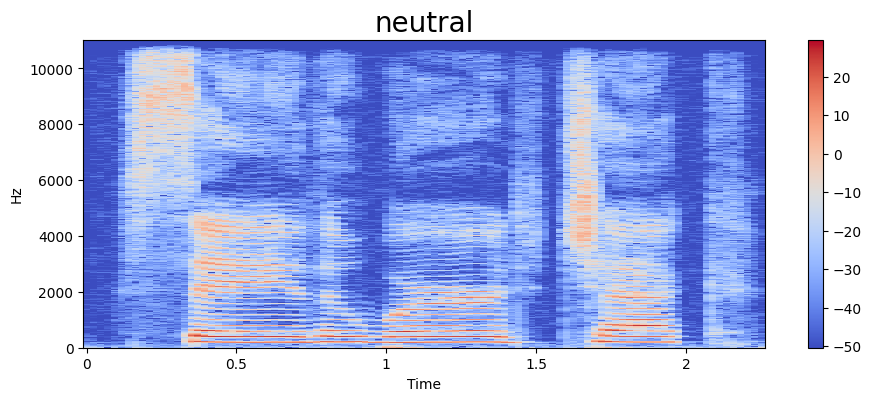

In [ ]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data)
spectogram(data, sampling_rate, emotion)
Audio(path)

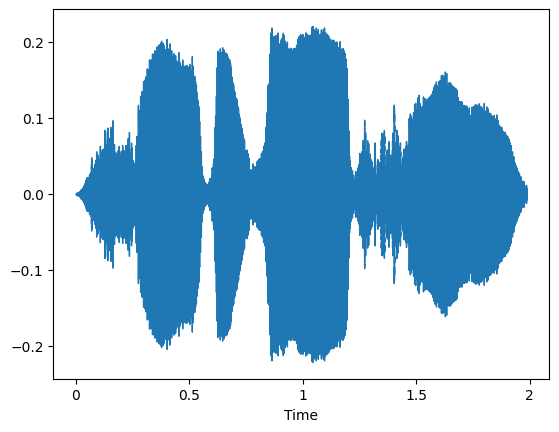

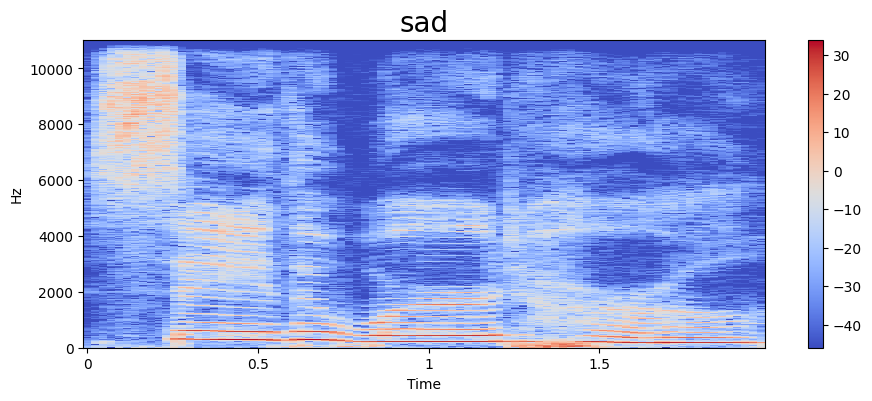

In [ ]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data)
spectogram(data, sampling_rate, emotion)
Audio(path)

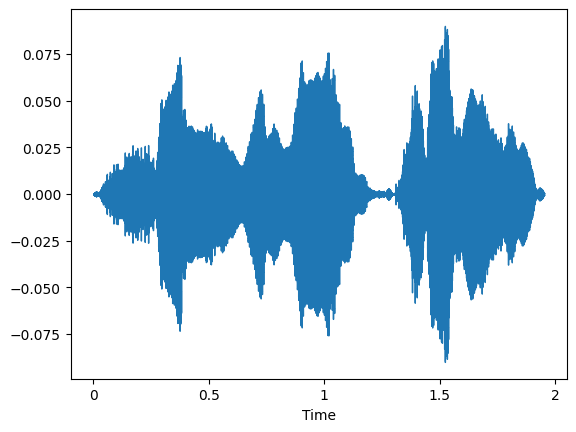

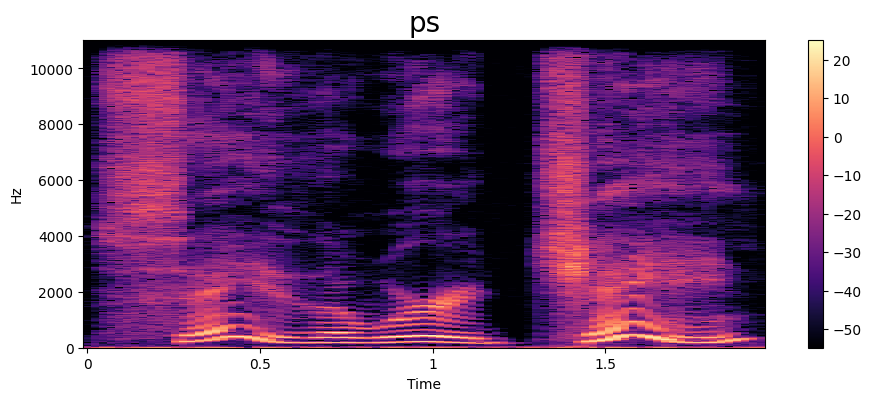

In [ ]:
emotion = 'ps'# projected spirt
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data)
spectogram(data, sampling_rate, emotion)
Audio(path)

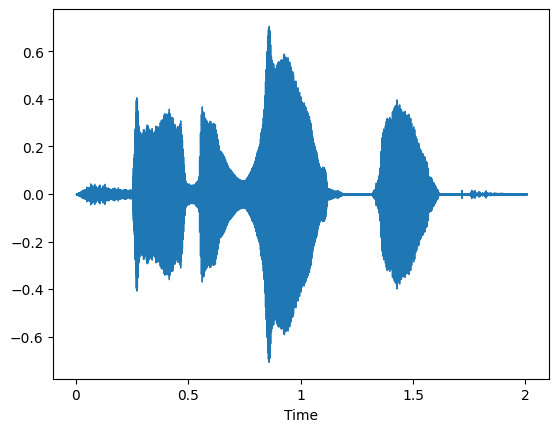

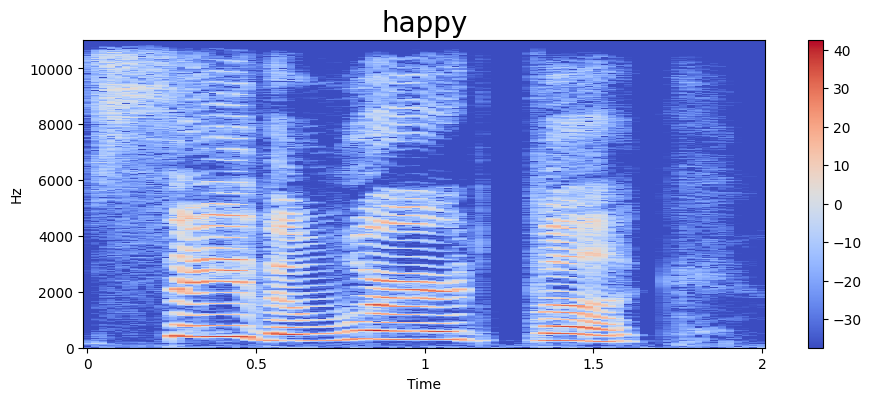

In [ ]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data)
spectogram(data, sampling_rate, emotion)
Audio(path)

## Feature Extraction

In [ ]:
# Mel-frequency cepstral coefficients
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [ ]:
extract_mfcc(df['speech'][0])

array([-4.0962091e+02,  1.0588283e+02, -2.1932734e+01,  8.1385441e+00,
       -9.2620850e+00,  9.3013868e+00, -2.7117333e+00, -1.3826966e+01,
       -8.8343515e+00,  4.4318762e+00, -1.0018441e+01, -5.8116484e-01,
       -7.6700153e+00, -8.0274326e-01,  2.9480481e-01, -5.9335647e+00,
       -5.0393429e+00,  1.4012390e+00, -7.5590014e+00, -1.0283049e-01,
       -3.0250700e+00, -2.4011757e+00, -2.6829860e+00,  2.5603147e+00,
       -3.1579251e+00, -5.8698893e-01, -3.1830437e+00,  2.8901069e+00,
        9.6356577e-01,  6.1726556e+00,  8.7249273e-01,  5.9309511e+00,
        1.8314990e+00,  5.6832352e+00,  7.1569967e+00,  3.6778572e+00,
        4.6244698e+00,  2.9202437e+00,  1.8245808e+00,  4.7798610e+00],
      dtype=float32)

In [ ]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [ ]:
X_mfcc

0       [-409.6209, 105.88283, -21.932734, 8.138544, -...
1       [-430.4275, 118.75985, 6.965281, 5.20493, -8.6...
2       [-404.71878, 55.775528, -11.1381035, 18.494602...
3       [-405.21143, 92.63942, -15.800637, 13.7942505,...
4       [-412.11026, 101.63891, -14.739551, 9.604844, ...
                              ...                        
2795    [-518.1542, 99.5123, 26.834148, 5.224762, 13.2...
2796    [-530.1118, 126.75701, 23.618029, -16.26344, 9...
2797    [-522.32336, 94.9513, 26.277548, -9.862188, 10...
2798    [-516.17395, 118.052666, 20.563543, -10.627628...
2799    [-507.62088, 120.561485, 19.35497, -9.1734495,...
Name: speech, Length: 2800, dtype: object

In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [ ]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [ ]:
y = y.toarray()

In [ ]:
y.shape

(2800, 7)

Feedforward Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout

model_feedforward = Sequential([
    Flatten(input_shape=(40, 1)),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model_feedforward.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_feedforward.summary()
history_feedforward = model_feedforward.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 40)                0         
                                                                 
 dense (Dense)               (None, 256)               10496     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0

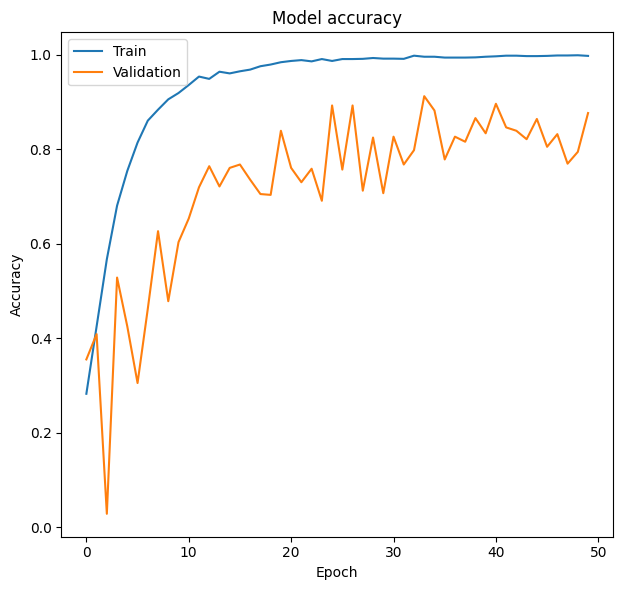

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_feedforward.history['accuracy'], label='Train')
plt.plot(history_feedforward.history['val_accuracy'], label='Validation')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

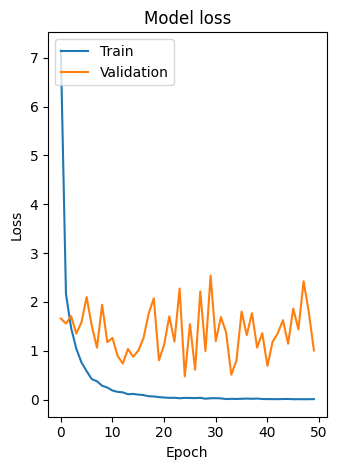

In [ ]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_feedforward.history['loss'], label='Train')
plt.plot(history_feedforward.history['val_loss'], label='Validation')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

1D Convolutional Neural Network (CNN)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

model_cnn = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(40, 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn.summary()
history_cnn = model_cnn.fit(X, y, validation_split=0.2, epochs=46, batch_size=64)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 38, 64)            256       
                                                                 
 max_pooling1d (MaxPooling1  (None, 19, 64)            0         
 D)                                                              
                                                                 
 dropout_3 (Dropout)         (None, 19, 64)            0         
                                                                 
 flatten_1 (Flatten)         (None, 1216)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               155776    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                      

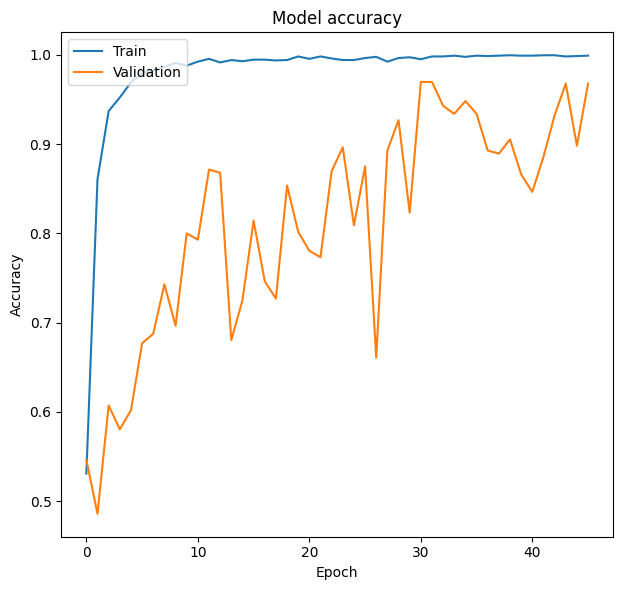

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='Train')
plt.plot(history_cnn.history['val_accuracy'], label='Validation')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

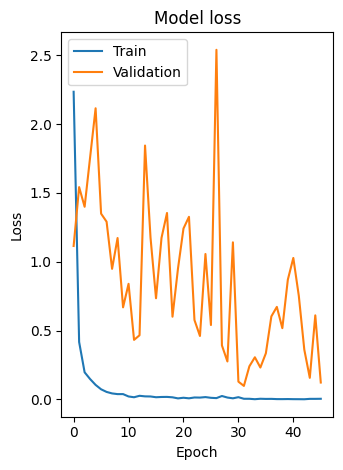

In [ ]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label='Train')
plt.plot(history_cnn.history['val_loss'], label='Validation')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Recurrent Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout

model_simple_rnn = Sequential([
    SimpleRNN(64, activation='relu', input_shape=(40, 1)),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model_simple_rnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_simple_rnn.summary()
history_simple_rnn = model_simple_rnn.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 64)                4224      
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 7)                 455       
                                                                 
Total params: 4679 (18.28 KB)
Trainable params: 4679 (18.28 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
35/35 [==============================] - 2s 25ms/step - loss: 1.4916 - accuracy: 0.4594 - val_loss: 2.8077 - val_accuracy: 0.1286
Epoch 2/50
35/35 [==============================] - 1s 14ms/step - loss: 0.8291 - accuracy: 0.6848 - val_loss: 2.5304 - val_accuracy: 0.1839
Ep

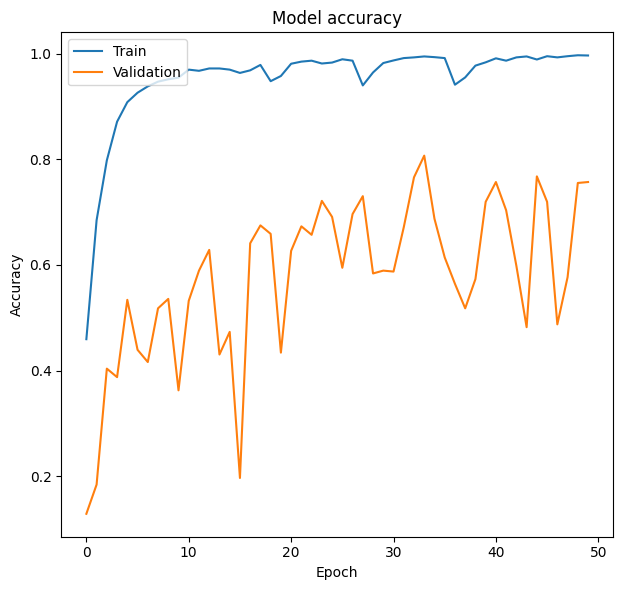

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_simple_rnn.history['accuracy'])
plt.plot(history_simple_rnn.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

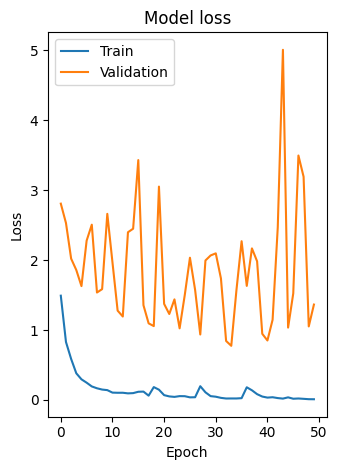

In [ ]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_simple_rnn.history['loss'])
plt.plot(history_simple_rnn.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()